In [1]:
import requests
from bs4 import BeautifulSoup
import json
import pandas as pd

In [2]:
base_url = 'https://understat.com/match/'
#match = str(input('Please enter the match id: '))
match = '18865'
url = base_url + match

In [3]:
url

'https://understat.com/match/18865'

In [4]:
res = requests.get(url)
soup = BeautifulSoup(res.content, 'lxml' )
scripts = soup.find_all('script')

In [5]:
scripts

[<script>
 			var THEME = localStorage.getItem("theme") || 'DARK';
 			document.body.className = "theme-" + THEME.toLowerCase();
 		</script>,
 <script>
 	var shotsData 	= JSON.parse('\x7B\x22h\x22\x3A\x5B\x7B\x22id\x22\x3A\x22518358\x22,\x22minute\x22\x3A\x224\x22,\x22result\x22\x3A\x22SavedShot\x22,\x22X\x22\x3A\x220.7240000152587891\x22,\x22Y\x22\x3A\x220.74\x22,\x22xG\x22\x3A\x220.011110288091003895\x22,\x22player\x22\x3A\x22Luis\x20Alberto\x22,\x22h_a\x22\x3A\x22h\x22,\x22player_id\x22\x3A\x221219\x22,\x22situation\x22\x3A\x22OpenPlay\x22,\x22season\x22\x3A\x222022\x22,\x22shotType\x22\x3A\x22RightFoot\x22,\x22match_id\x22\x3A\x2218865\x22,\x22h_team\x22\x3A\x22Lazio\x22,\x22a_team\x22\x3A\x22Juventus\x22,\x22h_goals\x22\x3A\x222\x22,\x22a_goals\x22\x3A\x221\x22,\x22date\x22\x3A\x222023\x2D04\x2D08\x2018\x3A45\x3A00\x22,\x22player_assisted\x22\x3A\x22Mattia\x20Zaccagni\x22,\x22lastAction\x22\x3A\x22Pass\x22\x7D,\x7B\x22id\x22\x3A\x22518360\x22,\x22minute\x22\x3A\x229\x22,\x22resul

In [7]:
scripts[1].string

"\n\tvar shotsData \t= JSON.parse('\\x7B\\x22h\\x22\\x3A\\x5B\\x7B\\x22id\\x22\\x3A\\x22518358\\x22,\\x22minute\\x22\\x3A\\x224\\x22,\\x22result\\x22\\x3A\\x22SavedShot\\x22,\\x22X\\x22\\x3A\\x220.7240000152587891\\x22,\\x22Y\\x22\\x3A\\x220.74\\x22,\\x22xG\\x22\\x3A\\x220.011110288091003895\\x22,\\x22player\\x22\\x3A\\x22Luis\\x20Alberto\\x22,\\x22h_a\\x22\\x3A\\x22h\\x22,\\x22player_id\\x22\\x3A\\x221219\\x22,\\x22situation\\x22\\x3A\\x22OpenPlay\\x22,\\x22season\\x22\\x3A\\x222022\\x22,\\x22shotType\\x22\\x3A\\x22RightFoot\\x22,\\x22match_id\\x22\\x3A\\x2218865\\x22,\\x22h_team\\x22\\x3A\\x22Lazio\\x22,\\x22a_team\\x22\\x3A\\x22Juventus\\x22,\\x22h_goals\\x22\\x3A\\x222\\x22,\\x22a_goals\\x22\\x3A\\x221\\x22,\\x22date\\x22\\x3A\\x222023\\x2D04\\x2D08\\x2018\\x3A45\\x3A00\\x22,\\x22player_assisted\\x22\\x3A\\x22Mattia\\x20Zaccagni\\x22,\\x22lastAction\\x22\\x3A\\x22Pass\\x22\\x7D,\\x7B\\x22id\\x22\\x3A\\x22518360\\x22,\\x22minute\\x22\\x3A\\x229\\x22,\\x22result\\x22\\x3A\\x22MissedS

In [8]:
strings = scripts[1].string

In [9]:
strings

"\n\tvar shotsData \t= JSON.parse('\\x7B\\x22h\\x22\\x3A\\x5B\\x7B\\x22id\\x22\\x3A\\x22518358\\x22,\\x22minute\\x22\\x3A\\x224\\x22,\\x22result\\x22\\x3A\\x22SavedShot\\x22,\\x22X\\x22\\x3A\\x220.7240000152587891\\x22,\\x22Y\\x22\\x3A\\x220.74\\x22,\\x22xG\\x22\\x3A\\x220.011110288091003895\\x22,\\x22player\\x22\\x3A\\x22Luis\\x20Alberto\\x22,\\x22h_a\\x22\\x3A\\x22h\\x22,\\x22player_id\\x22\\x3A\\x221219\\x22,\\x22situation\\x22\\x3A\\x22OpenPlay\\x22,\\x22season\\x22\\x3A\\x222022\\x22,\\x22shotType\\x22\\x3A\\x22RightFoot\\x22,\\x22match_id\\x22\\x3A\\x2218865\\x22,\\x22h_team\\x22\\x3A\\x22Lazio\\x22,\\x22a_team\\x22\\x3A\\x22Juventus\\x22,\\x22h_goals\\x22\\x3A\\x222\\x22,\\x22a_goals\\x22\\x3A\\x221\\x22,\\x22date\\x22\\x3A\\x222023\\x2D04\\x2D08\\x2018\\x3A45\\x3A00\\x22,\\x22player_assisted\\x22\\x3A\\x22Mattia\\x20Zaccagni\\x22,\\x22lastAction\\x22\\x3A\\x22Pass\\x22\\x7D,\\x7B\\x22id\\x22\\x3A\\x22518360\\x22,\\x22minute\\x22\\x3A\\x229\\x22,\\x22result\\x22\\x3A\\x22MissedS

In [10]:
#eliminamos las cosas innecesarias del pirnicpio y del final
ind_start = strings.index("('")+2
ind_end = strings.index("')")

json_data = strings[ind_start:ind_end]
json_data = json_data.encode('utf8').decode('unicode_escape')

#covertimos strings en formato json
data = json.loads(json_data)

In [11]:
data

{'h': [{'id': '518358',
   'minute': '4',
   'result': 'SavedShot',
   'X': '0.7240000152587891',
   'Y': '0.74',
   'xG': '0.011110288091003895',
   'player': 'Luis Alberto',
   'h_a': 'h',
   'player_id': '1219',
   'situation': 'OpenPlay',
   'season': '2022',
   'shotType': 'RightFoot',
   'match_id': '18865',
   'h_team': 'Lazio',
   'a_team': 'Juventus',
   'h_goals': '2',
   'a_goals': '1',
   'date': '2023-04-08 18:45:00',
   'player_assisted': 'Mattia Zaccagni',
   'lastAction': 'Pass'},
  {'id': '518360',
   'minute': '9',
   'result': 'MissedShots',
   'X': '0.914000015258789',
   'Y': '0.544000015258789',
   'xG': '0.10795050859451294',
   'player': 'Sergej Milinkovic-Savic',
   'h_a': 'h',
   'player_id': '1543',
   'situation': 'SetPiece',
   'season': '2022',
   'shotType': 'Head',
   'match_id': '18865',
   'h_team': 'Lazio',
   'a_team': 'Juventus',
   'h_goals': '2',
   'a_goals': '1',
   'date': '2023-04-08 18:45:00',
   'player_assisted': 'Luis Alberto',
   'lastAct

In [12]:
x = []
y = []
xG = []
result = []
team = []
player = []
shotType = []
minute = []
lastAction = []
situation = []
player_assisted = []

data_away = data['a']
data_home = data['h']

for index in range(len(data_home)):
    for key in data_home[index]:
        if key == 'X':
            x.append(data_home[index][key])
        if key == 'Y':
            y.append(data_home[index][key])
        if key == 'h_team':
            team.append(data_home[index][key])
        if key == 'xG':
            xG.append(data_home[index][key])
        if key == 'result':
            result.append(data_home[index][key])
        if key == 'player':
            player.append(data_home[index][key])            
        if key == 'shotType':
            shotType.append(data_home[index][key])            
        if key == 'minute':
            minute.append(data_home[index][key])            
        if key == 'lastAction':
            lastAction.append(data_home[index][key]) 
        if key == 'situation':
            situation.append(data_home[index][key])  
        if key == 'player_assisted':
            player_assisted.append(data_home[index][key])            

for index in range(len(data_away)):
    for key in data_away[index]:
        if key == 'X':
            x.append(data_away[index][key])
        if key == 'Y':
            y.append(data_away[index][key])
        if key == 'a_team':
            team.append(data_away[index][key])
        if key == 'xG':
            xG.append(data_away[index][key])
        if key == 'result':
            result.append(data_away[index][key])
        if key == 'player':
            player.append(data_away[index][key])
        if key == 'shotType':
            shotType.append(data_away[index][key]) 
        if key == 'minute':
            minute.append(data_away[index][key])  
        if key == 'lastAction':
            lastAction.append(data_away[index][key])
        if key == 'situation':
            situation.append(data_away[index][key])
        if key == 'player_assisted':
            player_assisted.append(data_away[index][key]) 

In [13]:
result

['SavedShot',
 'MissedShots',
 'MissedShots',
 'BlockedShot',
 'SavedShot',
 'Goal',
 'Goal',
 'BlockedShot',
 'MissedShots',
 'MissedShots',
 'SavedShot',
 'SavedShot',
 'Goal',
 'MissedShots',
 'BlockedShot',
 'SavedShot',
 'BlockedShot',
 'MissedShots',
 'BlockedShot',
 'MissedShots']

In [14]:
col_names = ['x','y','xg','team','player','shotType','result','minute','lastAction','situation','player_assisted']

df = pd.DataFrame([x,y,xG,team,player,shotType,result,minute,lastAction,situation,player_assisted], index = col_names)
df = df.T

In [15]:
df

,x,y,xg,team,player,shotType,result,minute,lastAction,situation,player_assisted
0,0.7240000152587891,0.74,0.011110288091003895,Lazio,Luis Alberto,RightFoot,SavedShot,4,Pass,OpenPlay,Mattia Zaccagni
1,0.914000015258789,0.544000015258789,0.10795050859451294,Lazio,Sergej Milinkovic-Savic,Head,MissedShots,9,Cross,SetPiece,Luis Alberto
2,0.905,0.5270000076293946,0.06845464557409286,Lazio,Sergej Milinkovic-Savic,Head,MissedShots,11,Cross,FromCorner,Luis Alberto
3,0.725999984741211,0.5159999847412109,0.049644842743873596,Lazio,Sergej Milinkovic-Savic,RightFoot,BlockedShot,14,Standard,DirectFreekick,None
4,0.8859999847412109,0.35700000762939454,0.06794381886720657,Lazio,Ciro Immobile,RightFoot,SavedShot,28,Chipped,OpenPlay,Felipe Anderson
5,0.9419999694824219,0.445,0.4407545030117035,Lazio,Sergej Milinkovic-Savic,LeftFoot,Goal,37,Cross,OpenPlay,Mattia Zaccagni
6,0.8980000305175782,0.610999984741211,0.3509633243083954,Lazio,Mattia Zaccagni,RightFoot,Goal,52,Pass,OpenPlay,Luis Alberto
7,0.8090000152587891,0.524000015258789,0.0671779066324234,Lazio,Sergej Milinkovic-Savic,RightFoot,BlockedShot,59,Pass,OpenPlay,Ciro Immobile
8,0.9009999847412109,0.795,0.02330172434449196,Lazio,Luis Alberto,RightFoot,MissedShots,68,Pass,SetPiece,Pedro
9,0.9259999847412109,0.455,0.12303689867258072,Juventus,Dusan Vlahovic,Head,MissedShots,6,Cross,OpenPlay,Adrien Rabiot


In [16]:
luis = df[df['player'] == 'Luis Alberto']
luis

,x,y,xg,team,player,shotType,result,minute,lastAction,situation,player_assisted
0,0.7240000152587891,0.74,0.011110288091003895,Lazio,Luis Alberto,RightFoot,SavedShot,4,Pass,OpenPlay,Mattia Zaccagni
8,0.9009999847412109,0.795,0.02330172434449196,Lazio,Luis Alberto,RightFoot,MissedShots,68,Pass,SetPiece,Pedro


In [28]:
import matplotlib as plt
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch, VerticalPitch

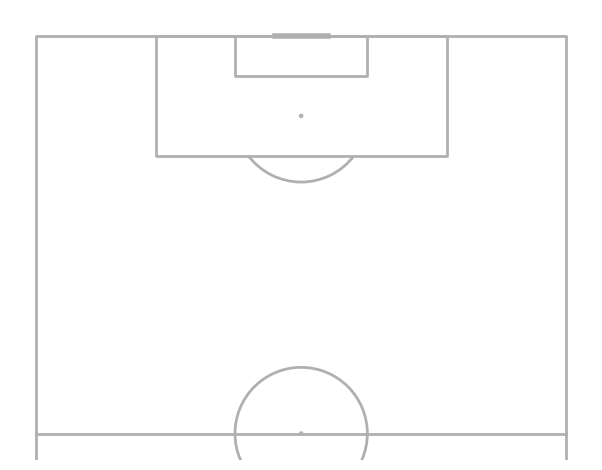

In [30]:
pitch = VerticalPitch(half=True)
fig, ax = pitch.draw()